# Comparatif des stratégies de parallelisation de la fonction gemm de BLIS

La fonction *gemm()* proposée par BLIS expose deux nouvelles boucles absentes dans les autres librairies BLAS comme OpenBLAS.  
 
La fonction gemm() de l'API OpenBLAS utilise 3 boucles autour de son *microkernel*. BLIS reprend ces 3 premières boucles pour sa propre fonction gemm mais implémente également 2 boucles supplémentaires au sein du microkernel utilisé par OpenBLAS pour un total de 5 boucles. Ces 5 boucles tournent alors ensuite d'un nouveau microkernel 

On commence par paralleliser tour à tour chacun des 4 boucles sujet à être parallelisée par BLIS (une des 5 boucles ne support pas encore la parallelisation). 
  
La stratégie de parallelisation des boucles se fait par la configuration de variables d'environnement directement depuis blis par la fonction _os.environ_. Ces variables d'environnement permettent de configurer manuellement la façon dont BLIS parallelise la fonction gemm.  
  
Les variables d'environnement à configurer sont les suivantes :
- BLIS_JC_NT (5ème boucle autour du microkenel)
- BLIS_IC_NT (3ème boucle autour du microkenel)
- BLIS_JR_NT (2ème boucle autour du microkenel)
- BLIS_IR_NT (1ère boucle autour du microkenel)

Pour plus d'information sur ces variables d'environnement :
https://github.com/flame/blis/blob/master/docs/Multithreading.md#environment-variables-the-manual-way

<font color="red">**REMARQUE**: Entre chaque stratégie, le kernel python doit être redémarré afin de reconfigurer les variables d'environnement avant l'importation de numpy</font>

In [1]:
import time 
import os 
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["BLIS_MAIN_FREE"]='1'
os.environ["BLIS_JC_NT"] = "6"
os.environ["BLIS_IC_NT"] = "1"
os.environ["BLIS_JR_NT"] = "1"
os.environ["BLIS_IR_NT"] = "1"
import numpy as np
from fonctions import time_count_np

In [2]:
results_blis = time_count_np("BLIS_JC6", small=False)

blis_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
blas_opt_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
  NOT AVAILABLE
openblas_clapack_info:
  NOT AVAILABLE
flame_info:
  NOT AVAILABLE
atlas_3_10_threads_info:
  NOT AVAILABLE
atlas_3_10_info:
  NOT AVAILABLE
atlas_threads_info:
  NOT AVAILABLE
atlas_info:
  NOT AVAILABLE
accelerate_info:
  NOT AVAILABLE
lapack_info:
    libraries = ['lapack', 'lapack']
    library_dirs = ['/usr/lib']

<font color="red">**RESTART KERNEL**</font>

In [1]:
import time 
import os 
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["BLIS_MAIN_FREE"]='1'
os.environ["BLIS_JC_NT"] = "1"
os.environ["BLIS_IC_NT"] = "6"
os.environ["BLIS_JR_NT"] = "1"
os.environ["BLIS_IR_NT"] = "1"
import numpy as np
from fonctions import time_count_np

In [2]:
results_blis = time_count_np("BLIS_IC6", small=False)

blis_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
blas_opt_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
  NOT AVAILABLE
openblas_clapack_info:
  NOT AVAILABLE
flame_info:
  NOT AVAILABLE
atlas_3_10_threads_info:
  NOT AVAILABLE
atlas_3_10_info:
  NOT AVAILABLE
atlas_threads_info:
  NOT AVAILABLE
atlas_info:
  NOT AVAILABLE
accelerate_info:
  NOT AVAILABLE
lapack_info:
    libraries = ['lapack', 'lapack']
    library_dirs = ['/usr/lib']

<font color="red">**RESTART KERNEL**</font>

In [3]:
import time 
import os 
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["BLIS_MAIN_FREE"]='1'
os.environ["BLIS_JC_NT"] = "1"
os.environ["BLIS_IC_NT"] = "1"
os.environ["BLIS_JR_NT"] = "6"
os.environ["BLIS_IR_NT"] = "1"
import numpy as np
from fonctions import time_count_np

In [4]:
results_blis = time_count_np("BLIS_JR6", small=False)

blis_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
blas_opt_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
  NOT AVAILABLE
openblas_clapack_info:
  NOT AVAILABLE
flame_info:
  NOT AVAILABLE
atlas_3_10_threads_info:
  NOT AVAILABLE
atlas_3_10_info:
  NOT AVAILABLE
atlas_threads_info:
  NOT AVAILABLE
atlas_info:
  NOT AVAILABLE
accelerate_info:
  NOT AVAILABLE
lapack_info:
    libraries = ['lapack', 'lapack']
    library_dirs = ['/usr/lib']

<font color="red">**RESTART KERNEL**</font>

In [1]:
import time 
import os 
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["BLIS_MAIN_FREE"]='1'
os.environ["BLIS_JC_NT"] = "1"
os.environ["BLIS_IC_NT"] = "1"
os.environ["BLIS_JR_NT"] = "1"
os.environ["BLIS_IR_NT"] = "6"
import numpy as np
from fonctions import time_count_np

In [2]:
results_blis = time_count_np("BLIS_IR6", small=False)

blis_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
blas_opt_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
  NOT AVAILABLE
openblas_clapack_info:
  NOT AVAILABLE
flame_info:
  NOT AVAILABLE
atlas_3_10_threads_info:
  NOT AVAILABLE
atlas_3_10_info:
  NOT AVAILABLE
atlas_threads_info:
  NOT AVAILABLE
atlas_info:
  NOT AVAILABLE
accelerate_info:
  NOT AVAILABLE
lapack_info:
    libraries = ['lapack', 'lapack']
    library_dirs = ['/usr/lib']

<font color="red">**RESTART KERNEL**</font>

In [3]:
import time 
import os 
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["BLIS_MAIN_FREE"]='1'
os.environ["BLIS_JC_NT"] = "3"
os.environ["BLIS_IC_NT"] = "2"
os.environ["BLIS_JR_NT"] = "1"
os.environ["BLIS_IR_NT"] = "1"
import numpy as np
from fonctions import time_count_np

In [4]:
results_blis = time_count_np("BLIS_JC3_IC_2", small=False)

blis_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
blas_opt_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
  NOT AVAILABLE
openblas_clapack_info:
  NOT AVAILABLE
flame_info:
  NOT AVAILABLE
atlas_3_10_threads_info:
  NOT AVAILABLE
atlas_3_10_info:
  NOT AVAILABLE
atlas_threads_info:
  NOT AVAILABLE
atlas_info:
  NOT AVAILABLE
accelerate_info:
  NOT AVAILABLE
lapack_info:
    libraries = ['lapack', 'lapack']
    library_dirs = ['/usr/lib']

<font color="red">**RESTART KERNEL**</font>

In [1]:
import time 
import os 
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["BLIS_MAIN_FREE"]='1'
os.environ["BLIS_JC_NT"] = "3"
os.environ["BLIS_IC_NT"] = "2"
os.environ["BLIS_JR_NT"] = "1"
os.environ["BLIS_IR_NT"] = "1"
import numpy as np
from fonctions import time_count_np

In [2]:
results_blis = time_count_np("BLIS_JC3_IC2", small=False)

blis_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
blas_opt_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
  NOT AVAILABLE
openblas_clapack_info:
  NOT AVAILABLE
flame_info:
  NOT AVAILABLE
atlas_3_10_threads_info:
  NOT AVAILABLE
atlas_3_10_info:
  NOT AVAILABLE
atlas_threads_info:
  NOT AVAILABLE
atlas_info:
  NOT AVAILABLE
accelerate_info:
  NOT AVAILABLE
lapack_info:
    libraries = ['lapack', 'lapack']
    library_dirs = ['/usr/lib']

<font color="red">**RESTART KERNEL**</font>

In [1]:
import time 
import os 
os.system("taskset -p 0xff %d" % os.getpid())
os.environ["BLIS_MAIN_FREE"]='1'
os.environ["BLIS_JC_NT"] = "1"
os.environ["BLIS_IC_NT"] = "3"
os.environ["BLIS_JR_NT"] = "1"
os.environ["BLIS_IR_NT"] = "2"
import numpy as np
from fonctions import time_count_np

In [2]:
results_blis = time_count_np("BLIS_IC3_IR2", small=False)

blis_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
blas_opt_info:
    libraries = ['blis', 'blis']
    library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
    define_macros = [('HAVE_CBLAS', None)]
    include_dirs = ['/home/cesar/Desktop/blis/frame/compat/cblas/src']
    language = c
    runtime_library_dirs = ['/home/cesar/Desktop/blis/lib/haswell']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
  NOT AVAILABLE
openblas_clapack_info:
  NOT AVAILABLE
flame_info:
  NOT AVAILABLE
atlas_3_10_threads_info:
  NOT AVAILABLE
atlas_3_10_info:
  NOT AVAILABLE
atlas_threads_info:
  NOT AVAILABLE
atlas_info:
  NOT AVAILABLE
accelerate_info:
  NOT AVAILABLE
lapack_info:
    libraries = ['lapack', 'lapack']
    library_dirs = ['/usr/lib']

# Graphiques des performance des différentes startégies.

In [1]:
import pickle
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
PATH = os.path.abspath('')
name1 = "BLIS_JC6"
name2 = "BLIS_IC6"
name3 = "BLIS_JR6"
name4 = "BLIS_IR6"
name5 = "BLIS_JC3_IC2"
name6 = "BLIS_IC3_IR2"

results1 = pickle.load(open(PATH+"/data/"+name1+".pkl","rb"))
x_1, y_1 = zip(*sorted(results1.items()))
results2 = pickle.load(open(PATH+"/data/"+name2+".pkl","rb"))
x_2, y_2 = zip(*sorted(results2.items()))
results3 = pickle.load(open(PATH+"/data/"+name3+".pkl","rb"))
x_3, y_3 = zip(*sorted(results3.items()))
results4 = pickle.load(open(PATH+"/data/"+name4+".pkl","rb"))
x_4, y_4 = zip(*sorted(results4.items()))
results5 = pickle.load(open(PATH+"/data/"+name5+".pkl","rb"))
x_5, y_5 = zip(*sorted(results5.items()))
results6 = pickle.load(open(PATH+"/data/"+name6+".pkl","rb"))
x_6, y_6 = zip(*sorted(results6.items()))

In [ ]:
home/cesar/Desktop/BLIS_python/fig

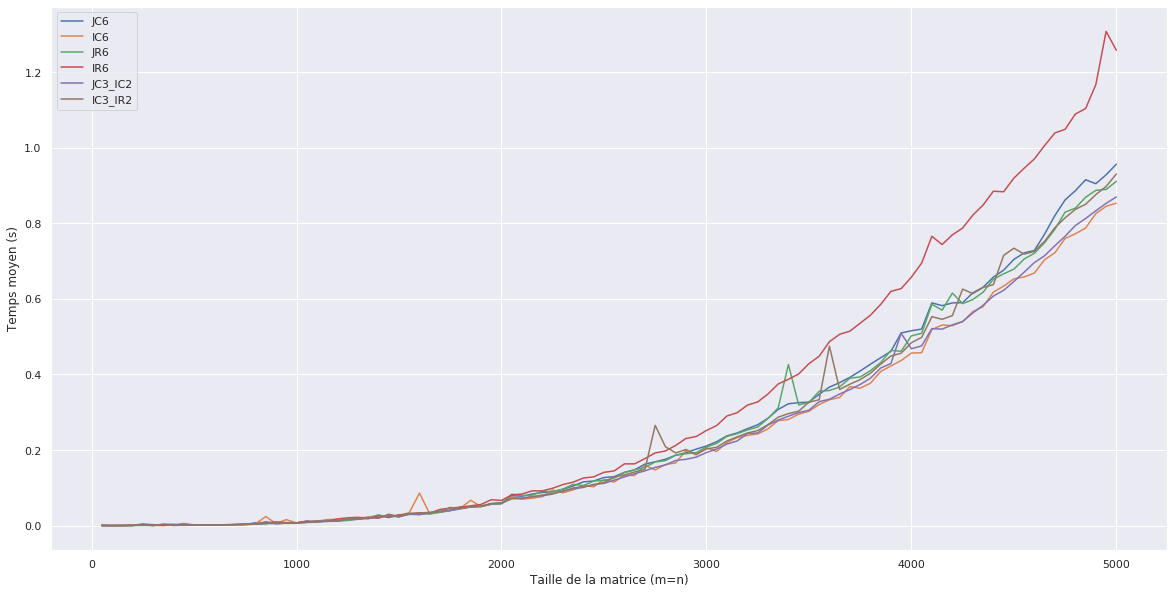

In [4]:
plt.figure(figsize=(20,10))
sns.set()
plt.plot(x_1,y_1,label='JC6')
plt.plot(x_2,y_2,label='IC6')
plt.plot(x_3,y_3,label='JR6')
plt.plot(x_4,y_4,label='IR6')
plt.plot(x_5,y_5,label='JC3_IC2')
plt.plot(x_6,y_6,label='IC3_IR2')
plt.xlabel('Taille de la matrice (m=n)')
plt.ylabel('Temps moyen (s)')
#plt.title("Comparatif temps d'execution sur le produit matriciel (m=n), NUM_THREADS=2")
plt.legend()
plt.savefig(PATH+"/fig/strategies_parallelisation.pdf")
plt.show()